## Ejercicio Regresión Polinómica 2

Usando los ejemplos hechos en clase debes resolver el problema que se plantea a continuación.

Usando los datos de casos confirmados de COVID-19 en el mundo frente a los días pasados desde que empezó la pandemia, haz el mejor predictor posible.



In [41]:
#Empezamos preparando los datos. Vamos a generar un dataframe con los días desde el comienzo de la 
#pandemia y el número de casos confirmados.

# Importamos librerias
import pandas as pd

# Cargando dataframe
df_covid = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_covid.drop(columns=["Province/State", "Country/Region", "Lat", "Long"], inplace=True)

casos_total_dia = []
dias = []
dia = 0

for column in df_covid:
    casos_total_dia.append(df_covid[column].sum())

    dia+=1
    dias.append(dia)

#print(casos_total_dia)

df_casos_diarios = pd.DataFrame({"dia": dias, "casos_diarios": casos_total_dia})

In [42]:
#Preparamos X e y
X = df_casos_diarios["dia"].to_frame()
y = df_casos_diarios["casos_diarios"].to_frame()

print(X.shape)
print(y.shape)

(769, 1)
(769, 1)


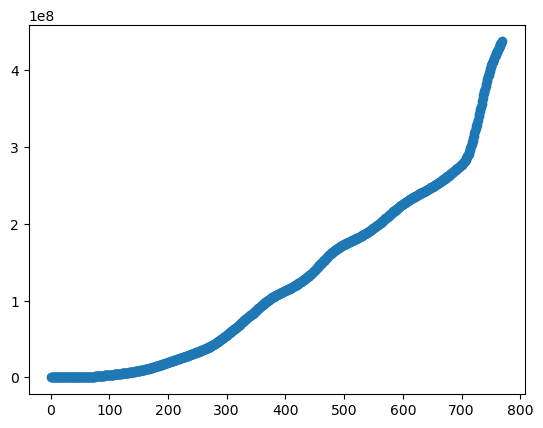

In [43]:
# Mostrar datos en gráfica de puntos
import matplotlib.pyplot as plt
plt.scatter(x=X, y=y)
plt.show()

## Probando con una regresión lineal

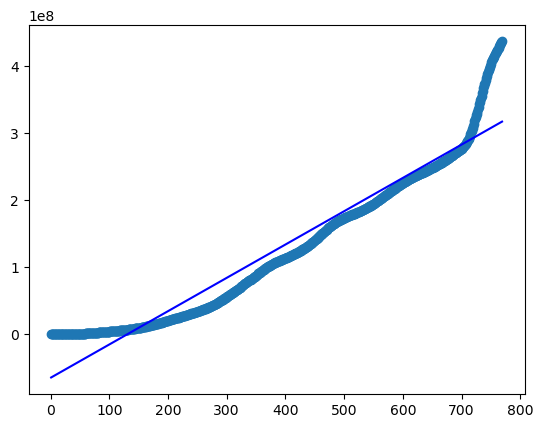

In [51]:
#Entrenamiento de modelo
#Dividimos el dataset en training y test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Creamos y entrenamos el modelo de regresión lineal.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

#Calculamos con el modelo los resultados para el dataset de test.
y_pred = lm.predict(X_test)

y_pred_total = lm.predict(X)
plt.scatter(X, y)
plt.plot(X,y_pred_total,color='blue')
plt.show()

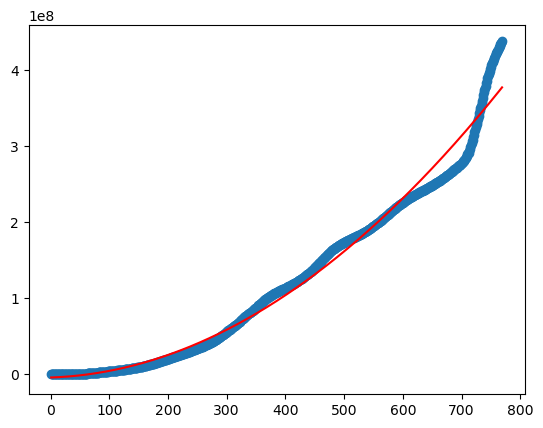

In [56]:
#Vamos a probar con un polinomio de grado 2:

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)

# Mostrando gráfica con el polinomio de grado 2:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred_total = lm.predict(X_poly)
plt.scatter(X, y)
plt.plot(X,y_pred_total,color='red')
plt.show() 

In [4]:
#Veamos que tal se ajusta a la curva:


In [5]:
#Probemos ahora con un grado superior:
